Summary of Assigned Points:
count    4553.000000
mean        0.634516
std         0.465591
min         0.000000
25%         0.250000
50%         0.500000
75%         1.000000
max         2.250000
Name: Assigned Points, dtype: float64


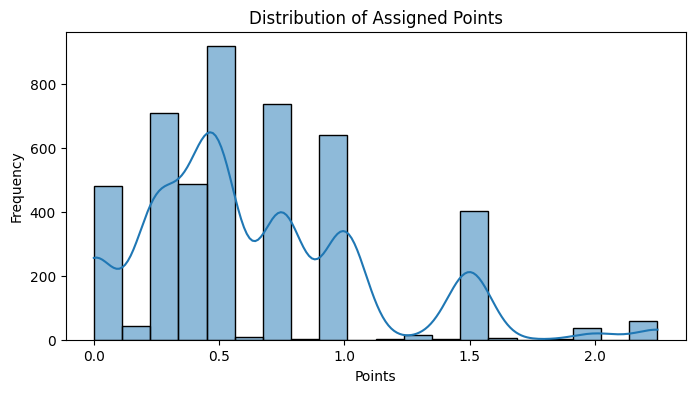

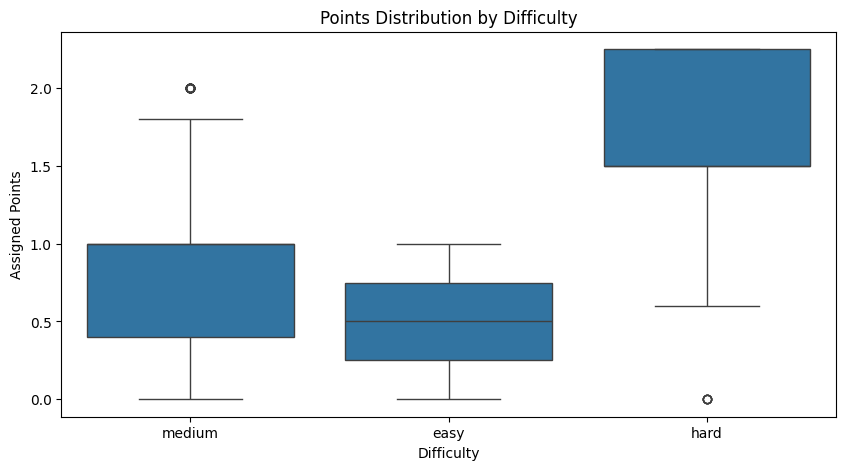


Missing Values in Each Column:
Student_Id           0
Question             0
Answer Choices     882
Answer              37
Difficulty           0
Assigned Points      0
dtype: int64

Answer Rate: 99.19%
Missing Answer Rate: 0.81%

Total Score Statistics per Student:
count    150.000000
mean      19.259667
std        3.183944
min        0.500000
25%       18.000000
50%       19.405000
75%       20.987500
max       25.450000
Name: Total Score, dtype: float64


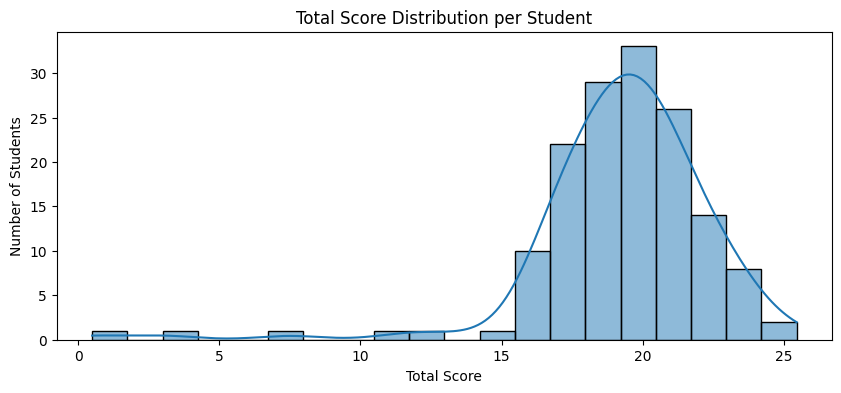


Top 5 Students by Total Score:
         Student_Id  Total Score
47    Candidate 351        25.45
20    Candidate 325        24.80
132   Candidate 460        24.05
83    Candidate 396        23.94
73    Candidate 382        23.80

Bottom 5 Students by Total Score:
        Student_Id  Total Score
30   Candidate 302         0.50
29   Candidate 301         3.05
28   Candidate 333         7.50
31   Candidate 333        11.50
0    Candidate 301        12.50

Answer Rate by Difficulty:
  Difficulty  Answer Rate
0       easy     0.995556
1       hard     1.000000
2     medium     0.986022


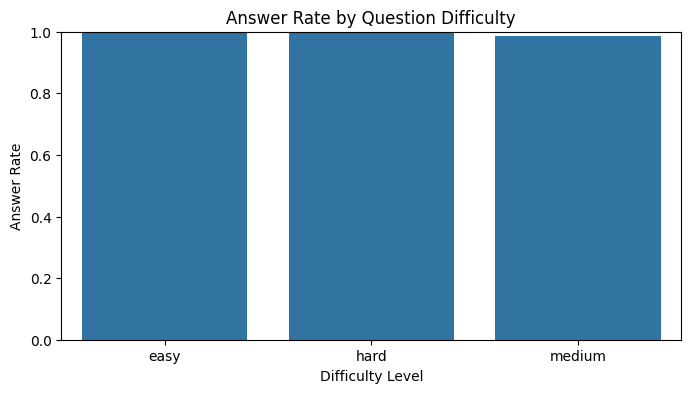

In [ ]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Load Data
df = pd.read_csv("../data/processed/updated_data_with_points.csv")

# 📊 1. Summary Statistics
print("Summary of Assigned Points:")
print(df['Assigned Points'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(df['Assigned Points'], bins=20, kde=True)
plt.title("Distribution of Assigned Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

# 📈 2. Points Distribution by Difficulty Level
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Difficulty', y='Assigned Points')
plt.title("Points Distribution by Difficulty")
plt.show()

# 🔍 3. Missing Values Overview
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

answered_ratio = df['Answer'].notnull().mean()
print(f"\nAnswer Rate: {answered_ratio:.2%}")
print(f"Missing Answer Rate: {(1 - answered_ratio):.2%}")

# 📚 4. Total Points Per Student
student_scores = df.groupby("Student_Id")["Assigned Points"].sum().reset_index()
student_scores.columns = ["Student_Id", "Total Score"]

print("\nTotal Score Statistics per Student:")
print(student_scores['Total Score'].describe())

plt.figure(figsize=(10, 4))
sns.histplot(student_scores["Total Score"], bins=20, kde=True)
plt.title("Total Score Distribution per Student")
plt.xlabel("Total Score")
plt.ylabel("Number of Students")
plt.show()

# 🏆 5. Top and Bottom Performing Students
print("\nTop 5 Students by Total Score:")
print(student_scores.sort_values(by="Total Score", ascending=False).head())

print("\nBottom 5 Students by Total Score:")
print(student_scores.sort_values(by="Total Score", ascending=True).head())

# 📉 6. Answer Rate by Difficulty Level
difficulty_answer_rate = df.groupby("Difficulty")["Answer"].apply(lambda x: x.notnull().mean()).reset_index()
difficulty_answer_rate.columns = ["Difficulty", "Answer Rate"]

print("\nAnswer Rate by Difficulty:")
print(difficulty_answer_rate)

plt.figure(figsize=(8, 4))
sns.barplot(data=difficulty_answer_rate, x="Difficulty", y="Answer Rate")
plt.title("Answer Rate by Question Difficulty")
plt.ylabel("Answer Rate")
plt.xlabel("Difficulty Level")
plt.ylim(0, 1)
plt.show()
